# Assignment 02

## Exercise 01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy as sp
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import pandas as pd

Let's suppose we have a set of observations $x=(x_1,…,x_N)^T$, that are drawn independent and identically distributed (i.i.d) from a Gaussian distribution with unknown mean $\mu$ and variance $\sigma^2$

For this example, we are going to assume that the unknown parameters are $\mu$=2 and $\sigma^2$=25 and the number of samples N=100.

In [2]:
mean = 2
variance = 25
std_dev = np.sqrt(25)
N = 100

### Task1:
Plot this (unknown) distribution together with the samples in the range $[-20, 20]$.

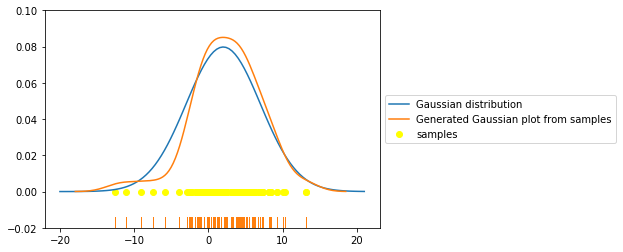

In [3]:
distribution = np.random.normal(loc = 2, scale = std_dev, size=N)

data= np.hstack(((distribution[:,np.newaxis]),
                 np.zeros(distribution[:,np.newaxis].shape))) 

plt.plot(np.linspace(-20,21,100),
         plt.mlab.normpdf(np.linspace(-20,21,100), 
                          mean, std_dev),
         label = "Gaussian distribution")

sns.distplot(distribution,hist=False, rug=True,
             label = "Generated Gaussian plot from samples")

plt.scatter(data[:,0],data[:,1],color='yellow', label = 'samples')
plt.ylim(-0.02,0.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Task2:
* Implement the likelihood function in python (you can simply use the existing python implementations)
* Use a general optimization method to find the values for $\mu$ and $\sigma^2$.

In [4]:
mu_calculated, std_dev_calulated = sp.stats.norm.fit(distribution)

print ("Calculated Mean: ", mu_calculated,"; Calculated Variance (sigma^2): ", std_dev_calulated**2)

Calculated Mean:  2.432037837648402 ; Calculated Variance (sigma^2):  20.61522552087914


In [5]:
x_i = data[:,0]
N_samples = (x_i.size)

sample_mean = 1/N_samples*np.sum(x_i)
sample_variance = (1/(N_samples-1))*np.sum((x_i-sample_mean)**2)

print ("Sample Mean: ", sample_mean,"; Sample Variance: ", sample_variance)


Sample Mean:  2.432037837648402 ; Sample Variance:  20.823460122100144


### Task3:

Given:
<br>
$\mu = \begin{bmatrix}
      0\\[0.3em]
      0\\[0.3em]
     \end{bmatrix}$
<br>
$\Sigma = \begin{bmatrix}
      0.5 & 0\\[0.3em]
      0 & 0.5\\[0.3em]
     \end{bmatrix}$
<br>
1. Visualise a Gaussian with the given parameters.
2. Visualise a marginal Gaussian.
3. Visualise a slice of Gaussian.

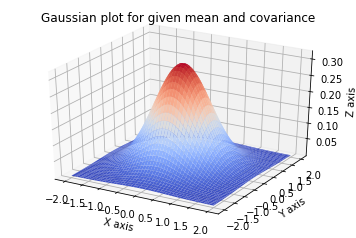

In [6]:
#https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d

mu = np.array([0,0])
sigma = np.array([[0.5, 0],[0, 0.5]])
data = np.random.multivariate_normal(mu, sigma, 200)
df = pd.DataFrame(data, columns=["x", "y"])


N = 100
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X,Y)
xy = np.empty(X.shape + (2,))
xy[:, :, 0] = X; xy[:, :, 1] = Y

Z = multivariate_normal.pdf(xy,mu,sigma)


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z ,cmap=cm.coolwarm)
plt.title('Gaussian plot for given mean and covariance')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

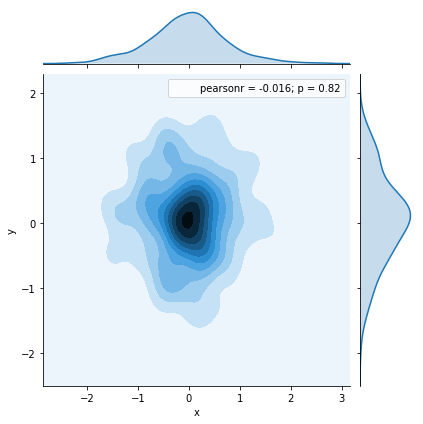

In [7]:
# Marginal Gaussians against the two variables

sns.jointplot(x="x", y="y", data=df, kind="kde");

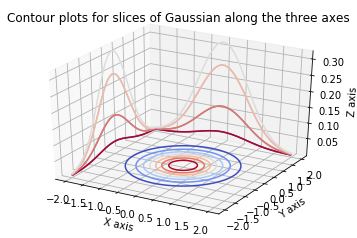

In [8]:
#Plots for slices of the Gaussian along x, y and z axes
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour(X, Y, Z, zdir='z', offset=0, cmap=cm.coolwarm)
ax.contour(X, Y, Z, zdir='y', offset=2, cmap=cm.coolwarm)
ax.contour(X, Y, Z, zdir='x', offset=-2, cmap=cm.coolwarm)
plt.title('Contour plots for slices of Gaussian along the three axes')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

### Task4: 

**Given**:

Number of samples is 1000 from them 330 samples are labeled as class $A$ and 670 samples are labeled as class $B$. There are 2 features $X1$ and $X2$. It is observed that  $p(A,X1)$=248,  $p(A,X2)$=82, $p(B,X1)$=168, $p(B,X2)$=502

**Compute**:

- Prior $p(A)$, $p(B)$
- Likelihood $p(X1|A)$, $p(X1|B)$
- Posterior $p(A|X1)$

In [9]:
N = 1000
N_A = 330
N_B = 670

P_AX1 =  0.248
P_AX2 = 0.082
P_BX1 = 0.168
p_BX2 = 0.502

P_A = N_A/N
P_B = N_B/N

P_X1_A = P_AX1 / P_A
P_X1_B = P_BX1 / P_B

P_A_X1 = P_AX1/((P_X1_A * P_A) + (P_X1_B * P_B))

print ("Prior P(A)=",P_A,",  P(B)=",P_B)
print ("Likelihood P(X1|A)=",P_X1_A,",  P(X1|B)=",P_X1_B)
print ("Posterior P(A|X1)=",P_A_X1)

Prior P(A)= 0.33 ,  P(B)= 0.67
Likelihood P(X1|A)= 0.7515151515151515 ,  P(X1|B)= 0.2507462686567164
Posterior P(A|X1)= 0.5961538461538461
